In [1]:
# Change all the "game" to whichever file you want to preprocess and save as

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [4]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,525610,0,0,suikablyat,403,65,-1,1.4,"October 15, 2022",Clunky UI
1,525610,0,0,76561197990732375,17,1,1,31.7,"September 20, 2022",The game is very good learning material. The b...
2,525610,1,0,rykemasters,564,8,1,59.9,"August 14, 2022","The lack of a ""mixed"" review option is a probl..."
3,525610,4,0,Matrix30815,309,66,-1,2.3,"May 3, 2022","Don't Buy, The game isn't even finished and th..."
4,525610,2,0,absorbing,487,1,-1,3.1,"April 26, 2022","Such a shame about this game, however for quit..."


In [5]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [6]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [7]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,1.4,"October 15, 2022",Clunky UI
1,0,0,1,31.7,"September 20, 2022",The game is very good learning material. The b...
2,1,0,1,59.9,"August 14, 2022","The lack of a ""mixed"" review option is a probl..."
3,4,0,-1,2.3,"May 3, 2022","Don't Buy, The game isn't even finished and th..."
4,2,0,-1,3.1,"April 26, 2022","Such a shame about this game, however for quit..."


In [8]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [9]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 15, 2022",Clunky UI,0,0,1.4,-1
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1
5,"February 2, 2022","I like the game , the idea and ofc what it bri...",1,0,0.6,1
6,"January 16, 2022","If this game is finished, it will be very fun ...",2,0,0.9,-1
7,"January 11, 2022",The best game about engineering. I started pla...,0,0,23.6,1
8,"November 15, 2020",Its a nice concept. It is very similar to MHRD...,1,0,2.5,-1
9,"November 13, 2020","Conceptually, this game could be great fun and...",0,0,0.8,-1


In [10]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [11]:
import datetime as dt

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  147 non-null    object 
 1   Review_Text     147 non-null    object 
 2   Num_Helpful     147 non-null    int64  
 3   Num_Funny       147 non-null    int64  
 4   Hours_Played    147 non-null    float64
 5   Recommend       147 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 7.0+ KB


In [13]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18956/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 15, 2022",Clunky UI,0,0,1.4,-1,1665792000
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1,1663632000
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1,1660435200
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1,1651536000
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1,1650931200


In [14]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18956/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,1.4,-1,1665792000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1,1663632000,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1,1660435200,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1,1651536000,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1,1650931200,2729


In [15]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,1.4,-1,1665792000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1,1663632000,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1,1660435200,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1,1651536000,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1,1650931200,2729


## - Data Aggregation -

### Number of text reviews per day:

In [16]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2754,"October 15, 2022",Clunky UI
1,2750,"September 20, 2022",The game is very good learning material. The b...
2,2745,"August 14, 2022","The lack of a ""mixed"" review option is a probl..."
3,2730,"May 3, 2022","Don't Buy, The game isn't even finished and th..."
4,2729,"April 26, 2022","Such a shame about this game, however for quit..."


In [17]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2438,"September 28, 2016",12
1,2439,"October 1, 2016",2
2,2439,"October 2, 2016",2
3,2439,"October 3, 2016",2
4,2439,"October 4, 2016",4
...,...,...,...
73,2729,"April 26, 2022",1
74,2730,"May 3, 2022",1
75,2745,"August 14, 2022",1
76,2750,"September 20, 2022",1


<AxesSubplot:>

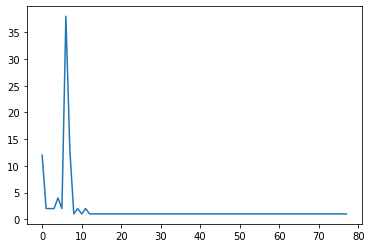

In [18]:
text_days['review_count'].plot()

In [19]:
# total number of text reviews
text_days['review_count'].sum()

147

In [20]:
# average number of text reviews per day
text_days['review_count'].mean()

1.8846153846153846

### Number of text reviews per week:

In [21]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2438,12
1,2439,63
2,2440,4
3,2441,3
4,2442,2
5,2444,1
6,2447,1
7,2448,1
8,2455,1
9,2457,1


<AxesSubplot:>

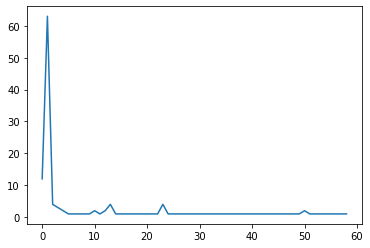

In [22]:
text_weeks['review_count'].plot()

In [23]:
# total number of text reviews
text_weeks['review_count'].sum()

147

In [24]:
# average number of text reviews per week
text_weeks['review_count'].mean()

2.4915254237288136

### Num_Helpful per week:

In [25]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,1.4,-1,1665792000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1,1663632000,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1,1660435200,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1,1651536000,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1,1650931200,2729


In [26]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2438,549
1,2439,467
2,2440,5
3,2441,5
4,2442,15
5,2444,2
6,2447,1
7,2448,11
8,2455,0
9,2457,4


In [27]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2438,159,0,12.0,45.750000
2439,47,0,3.0,7.412698
2440,3,0,1.0,1.250000
2441,3,0,2.0,1.666667
2442,13,2,7.5,7.500000
2444,2,2,2.0,2.000000
2447,1,1,1.0,1.000000
2448,11,11,11.0,11.000000
2455,0,0,0.0,0.000000


In [28]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1221

In [29]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

8.306122448979592

### Num_Funny per week:

In [30]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2438,30
1,2439,101
2,2440,0
3,2441,0
4,2442,0
5,2444,0
6,2447,0
7,2448,0
8,2455,0
9,2457,1


In [31]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2438,5,0,2.5,2.500000
2439,14,0,0.0,1.603175
2440,0,0,0.0,0.000000
2441,0,0,0.0,0.000000
2442,0,0,0.0,0.000000
2444,0,0,0.0,0.000000
2447,0,0,0.0,0.000000
2448,0,0,0.0,0.000000
2455,0,0,0.0,0.000000


In [32]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

144

In [33]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.9795918367346939

### Hours_Played per week:

In [34]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2438,325.2
1,2439,295.0
2,2440,51.9
3,2441,32.9
4,2442,19.7
5,2444,0.6
6,2447,2.1
7,2448,2.3
8,2455,1.7
9,2457,20.6


In [35]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2438,106.6,0.3,0.75,27.100000
2439,31.3,0.1,1.70,4.682540
2440,33.1,4.4,7.20,12.975000
2441,31.6,0.5,0.80,10.966667
2442,15.5,4.2,9.85,9.850000
2444,0.6,0.6,0.60,0.600000
2447,2.1,2.1,2.10,2.100000
2448,2.3,2.3,2.30,2.300000
2455,1.7,1.7,1.70,1.700000


In [36]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

1362.8999999999999

In [37]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

9.271428571428576

### Recommend per week:

In [38]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2438,0.000000
1,2439,0.301587
2,2440,0.500000
3,2441,0.333333
4,2442,1.000000
5,2444,-1.000000
6,2447,1.000000
7,2448,-1.000000
8,2455,-1.000000
9,2457,1.000000


In [39]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2438,1,-1,0.0,0.000000
2439,1,-1,1.0,0.301587
2440,1,-1,1.0,0.500000
2441,1,-1,1.0,0.333333
2442,1,1,1.0,1.000000
2444,-1,-1,-1.0,-1.000000
2447,1,1,1.0,1.000000
2448,-1,-1,-1.0,-1.000000
2455,-1,-1,-1.0,-1.000000


In [40]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

17

In [41]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.11564625850340136

## Feature Scaling - Min-Max Normalization

In [42]:
df_min_max_scaled = df.copy()

In [43]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,1.4,-1,1665792000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,31.7,1,1663632000,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,59.9,1,1660435200,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,2.3,-1,1651536000,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,3.1,-1,1650931200,2729


In [44]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,0.012207,0.0,1.000000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,0.296714,1.0,0.988678,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,0.561502,1.0,0.971920,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,0.020657,0.0,0.925272,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,0.028169,0.0,0.922101,2729
...,...,...,...,...,...,...,...,...
142,"September 29, 2016",This game is crap and does not work. The main ...,12,2,0.000000,0.0,0.000453,2439
143,"September 28, 2016",Hardware Engineering is an interesting concept...,159,3,0.001878,0.0,0.000000,2438
144,"September 28, 2016",ugg the performance of this game is terrible i...,11,5,0.009390,0.0,0.000000,2438
145,"September 28, 2016",UPDATE:Purchased this at release and asked for...,0,0,0.002817,1.0,0.000000,2438


In [45]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
df_sorted = df_sorted.reset_index(drop=True)

In [48]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18956/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [50]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 15, 2022",Clunky UI,0,0,0.012207,0.0,1.000000,2754
1,"September 20, 2022",The game is very good learning material. The b...,0,0,0.296714,1.0,0.988678,2750
2,"August 14, 2022","The lack of a ""mixed"" review option is a probl...",1,0,0.561502,1.0,0.971920,2745
3,"May 3, 2022","Don't Buy, The game isn't even finished and th...",4,0,0.020657,0.0,0.925272,2730
4,"April 26, 2022","Such a shame about this game, however for quit...",2,0,0.028169,0.0,0.922101,2729
5,"February 2, 2022","I like the game , the idea and ofc what it bri...",1,0,0.004695,1.0,0.884511,2717
6,"January 16, 2022","If this game is finished, it will be very fun ...",2,0,0.007512,0.0,0.876812,2715
7,"January 11, 2022",The best game about engineering. I started pla...,0,0,0.220657,1.0,0.874547,2714
8,"November 15, 2020",Its a nice concept. It is very similar to MHRD...,1,0,0.022535,0.0,0.683424,2654
9,"November 13, 2020","Conceptually, this game could be great fun and...",0,0,0.006573,0.0,0.682518,2654


In [51]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [52]:
df_text_list

Date_Epoch_Week
2438    [UPDATE:Purchased this at release and asked fo...
2439    [great consept and a great game. it suffers fr...
2440    [It's a nice game, you only have to get used t...
2441    [This is a great idea, just needs refinement (...
2442    [The game is recomended for the people who are...
2444    [At the moment, this game is not fun at all.*P...
2447    [Hardware Engineering is overall a fun game, b...
2448    [Please don't buy this game unless one day, th...
2455    [In this game's current state, you constantly ...
2457    [Right off the bat: The game is lacking a lot ...
2458    [Not badNot bad at allLike redstone on minecra...
2459    [A great concept, if you have an interest in p...
2460    [This is more a learning experience than a gam...
2461    [Since the update it is even playable without ...
2467    [I have always wanted to say one thing about t...
2468    [The least responsive testing times i've ever ...
2471    [Very interesting game about building circuits..

In [53]:
# storing data in JSON format
df_text_list.to_json('hwEngineering_text.json', orient = 'split', compression = 'infer')

In [54]:
# reading the JSON file
game_text = pd.read_json('hwEngineering_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2438  [UPDATE:Purchased this at release and asked fo...
1   Review_Text   2439  [great consept and a great game. it suffers fr...
2   Review_Text   2440  [It's a nice game, you only have to get used t...
3   Review_Text   2441  [This is a great idea, just needs refinement (...
4   Review_Text   2442  [The game is recomended for the people who are...
5   Review_Text   2444  [At the moment, this game is not fun at all.*P...
6   Review_Text   2447  [Hardware Engineering is overall a fun game, b...
7   Review_Text   2448  [Please don't buy this game unless one day, th...
8   Review_Text   2455  [In this game's current state, you constantly ...
9   Review_Text   2457  [Right off the bat: The game is lacking a lot ...
10  Review_Text   2458  [Not badNot bad at allLike redstone on minecra...
11  Review_Text   2459  [A great concept, if you have an interest in p...
12  Review_Text   2460  [This is more 

In [55]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('hwEngineering_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18956/3231660904.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [56]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('hwEngineering_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18956/2633778834.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [57]:
# storing data in CSV format
game_review = df_sorted.to_csv('hwEngineering_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])